# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

# Load the data and view the first 5 rows

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# info() gives details about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Null Values 
### From the above cell, we noticed that there are some null values. e.g., PoolQC has only 7 rows, Fence has 281 and so on (It was supposed to be 1460 rows). We can also observe that there are too many features and thus removing the ones with null values is a good approach. So, we delete columns with 30% or less missing values. 

In [4]:
del_columns = []
for col in df:
    if df[col].count() / len(df) < 0.3:
        del_columns.append(col)

del_columns.append('Id')
df.drop(del_columns, axis = 1, inplace = True)
print('Deleted columns - ', del_columns)

Deleted columns -  ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id']


# Visualise the distribution of SalePrice (Output variable)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

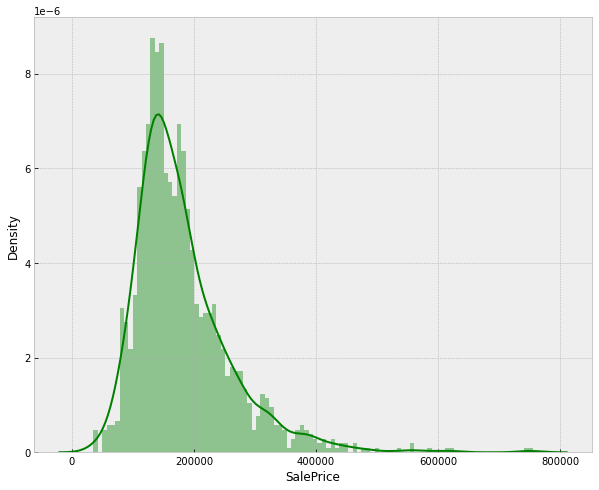

In [5]:
print(df['SalePrice'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(df['SalePrice'], color='g', bins=100)

In [6]:
#From the above graph we can notice that the SaleProce shows a normal distribution, with some outliers around 500K. 

In [7]:
df.dtypes.value_counts() #count of unique data types in the data

object     39
int64      34
float64     3
dtype: int64

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64']) #for now, let's consider only numeric data types
numeric_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


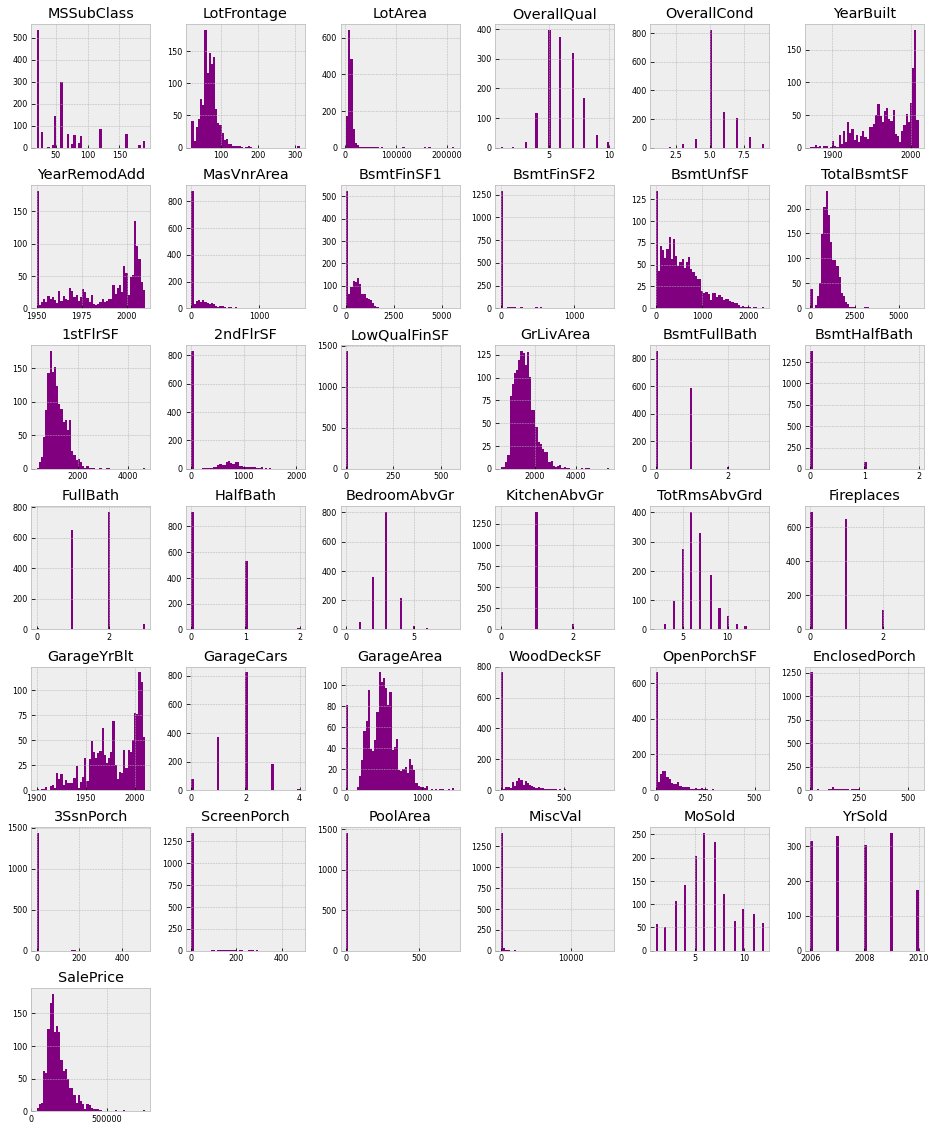

In [9]:
numeric_df.hist(figsize=(16, 20), color = 'purple',bins=50, xlabelsize=8, ylabelsize=8); #histogram of numeirc columns

In [10]:
numeric_df.corr()['SalePrice'][:-1]

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [11]:
num_corr = numeric_df.corr()['SalePrice'][:-1] 
#correlation matrix. 
#['SalePrice]- because we want correlation of all the columns with SalePrice and not any other column'
#[:-1] - We are not interested in correlation of SalePrice with SalePrice itself so we do not consider the last row

selected_features = num_corr[abs(num_corr) > 0.5].sort_values(ascending = False) #we retain columns that have > 0.5 (absolute -> ignore the sign)
print("There are {} strongly correlated values with SalePrice:\n{}".format(len(selected_features), selected_features))

There are 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


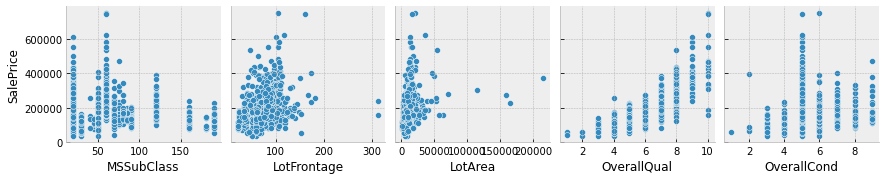

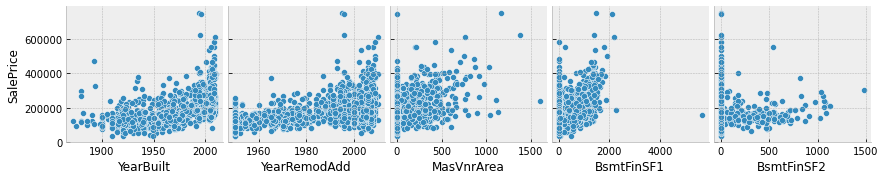

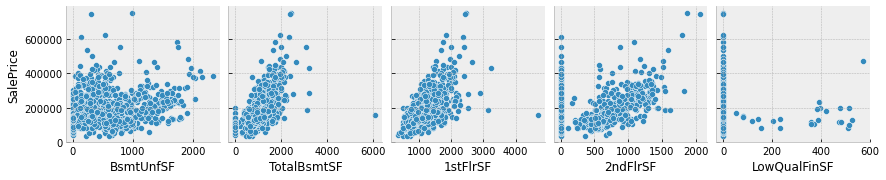

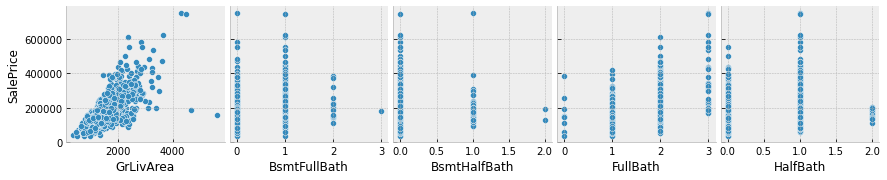

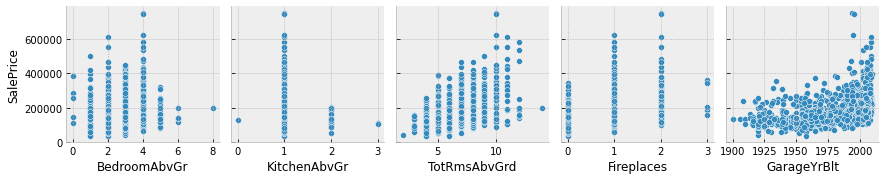

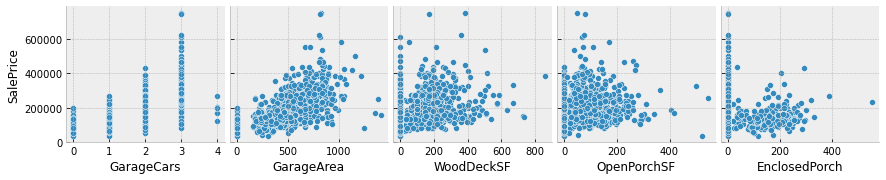

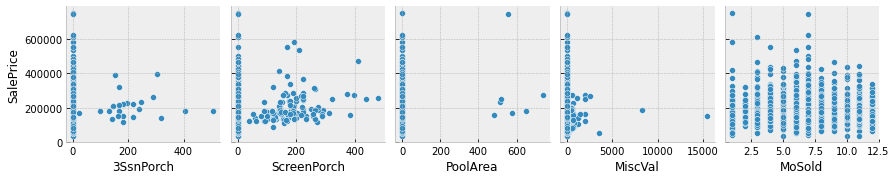

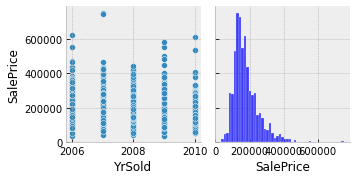

In [12]:
for i in range(0, len(numeric_df.columns), 5): #increment 5 after each iteration
    sns.pairplot(data=numeric_df,
                x_vars=numeric_df.columns[i:i+5], #5 columns from data, in 1 row
                y_vars=['SalePrice']) #plot againt SalePrice

In [13]:
import operator

nonzero_features = []
for i in range(0, len(numeric_df.columns) - 1): # -1 because the last column is SalePrice
    tempDf = numeric_df[[numeric_df.columns[i], 'SalePrice']] #Conider one column at a time (along with SalePrice)
    tempDf = tempDf[tempDf[numeric_df.columns[i]] != 0] #Filter for 0 values for that column
    nonzero_features.append(tempDf) #append the non-zero values to a list

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in nonzero_features}
#to better understand 'feature.corr()['SalePrice'][0]'', you can execute one part at a time.
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))

for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

In [14]:
#Lets store these columns in a list
top_features = [key for key, value in all_correlations if abs(value) >= 0.5]
top_features

['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'GarageArea',
 'TotalBsmtSF',
 'GarageCars',
 '2ndFlrSF',
 'GrLivArea',
 'OverallQual']

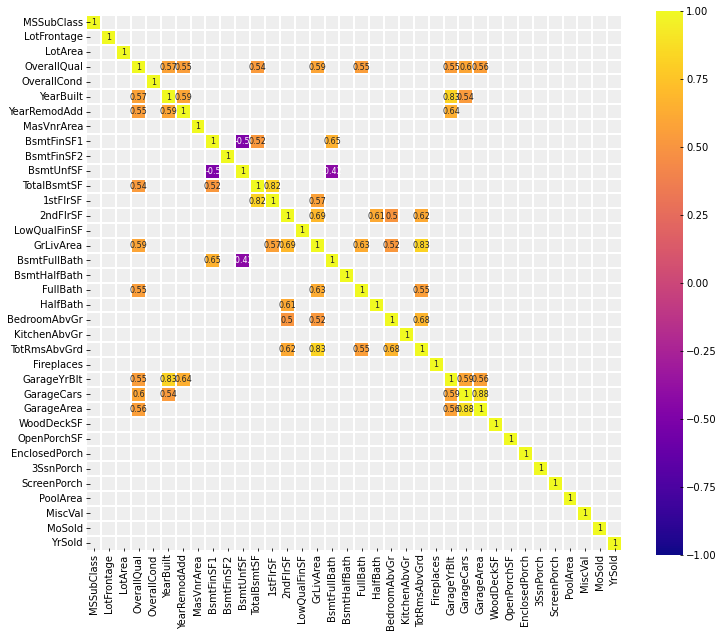

In [15]:
corr = numeric_df.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='plasma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

<span style='color:red'> The above graph shows that there are quite a few columns that are correlated with each other. This means that 2 variables show similar behavior and thus have equivalent effect on the output variable (SalePrice). So instead of having both the features, we can retain just one of them and still lose no data or moreover, the pattern in the data. This technique reduces the overfitting problem due to the presence of large number of features and in the bigger picture, it also improves the efficiency. </span>

<span style='color:purple'> Next step is to visualize how the quantitative features affect the output variable SalePrice. Quantitative values are different from just the numeric values. For example, MSSubClass Identifies the type of dwelling involved in the sale. To determine the features, reference document description.txt comes in handy. Following columns are selected for further analysis
</span>

In [19]:
quantitative_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


<span style = 'color:Blue'>Since there are a lot of columns, we will consider only those that are in top_features list</span>

In [20]:
features_to_analyse = [x for x in quantitative_features if x in top_features]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

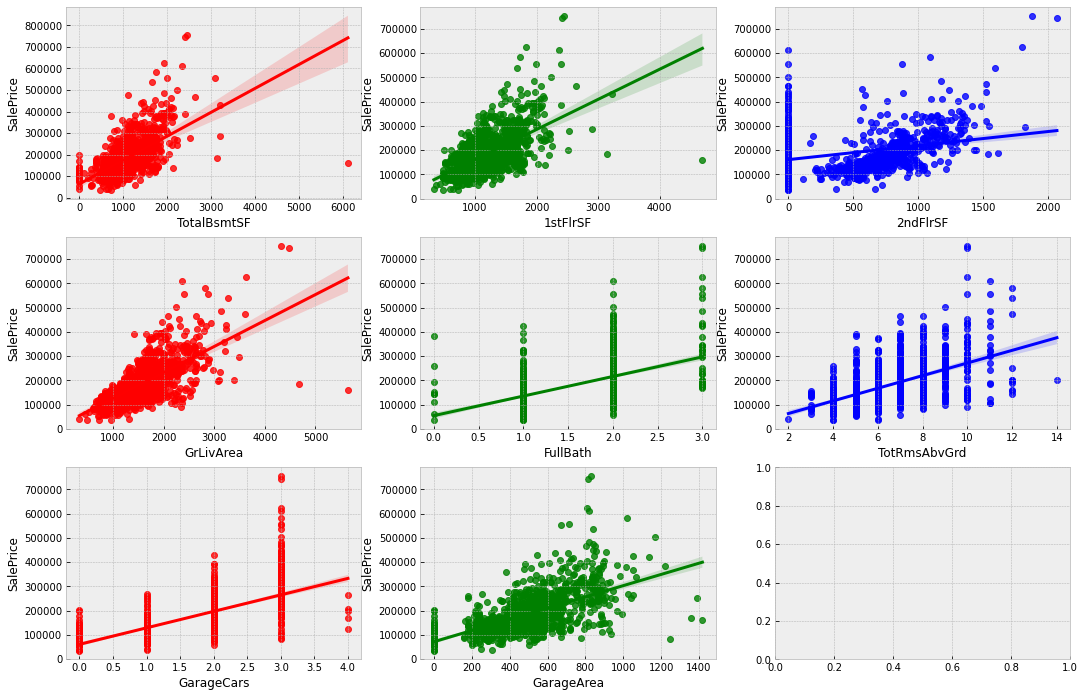

In [21]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))
color_val = ['red', 'green', 'blue']
for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(color=color_val[i%3], x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

In [22]:
cat_features = [f for f in df.columns if f not in quantitative_features[:-1]]
cat_df = df[cat_features]
cat_df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [23]:
#filter out the non numeric ones
df_not_num = cat_df.select_dtypes(include = ['O']) # 'O' fo Object
print('There are {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There are 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [24]:
cat_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Mn'), Text(3, 0, 'Av')])

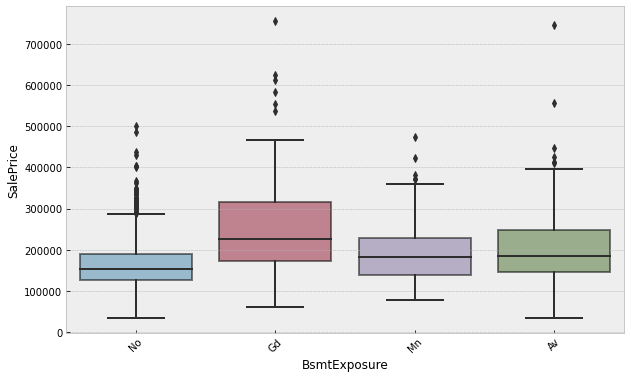

In [25]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=cat_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Fa'), Text(3, 0, 'Po')])

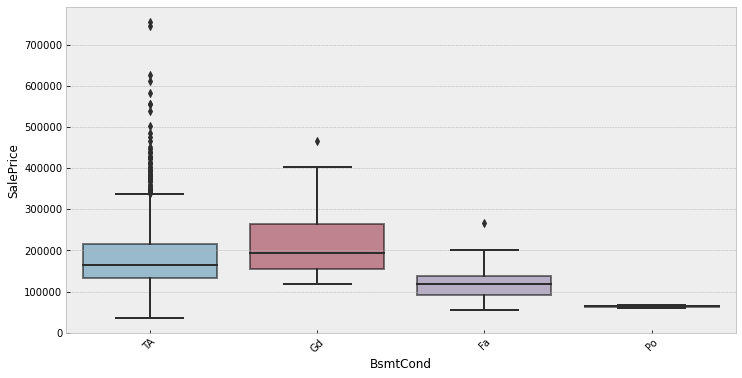

In [26]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='BsmtCond', y='SalePrice', data=cat_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

C:\Users\ashik\AppData\Local\Temp/ipykernel_10912/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ashik\AppData\Local\Temp/ipykernel_10912/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ashik\AppData\Local\Temp/ipykernel_10912/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ashik\AppData\Local\Temp/ipykernel_10912/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\ashik\AppData\Local\Temp/ipykernel_10912/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.g

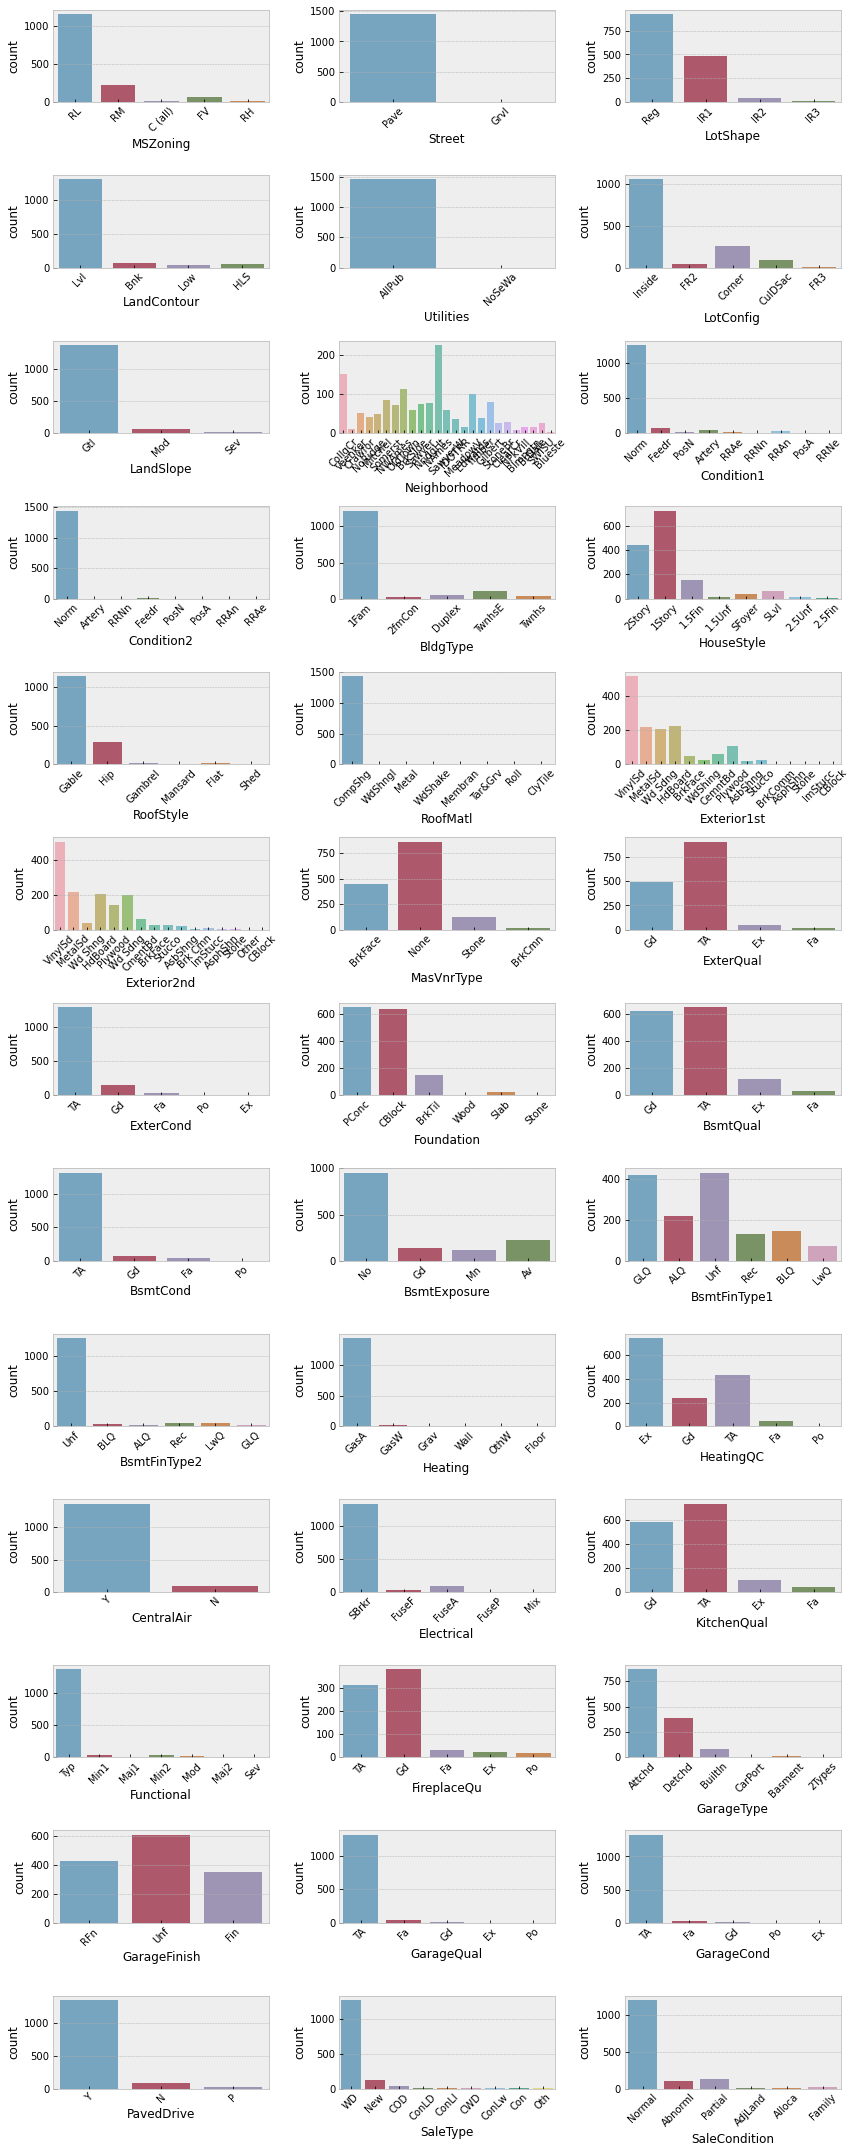

In [27]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

<span style = 'color:blue'>From the countplots above we can notice that some features such as Street, Heating and so on have large number of samples for only for one particular value. 
This means there aren't enough samples for various values of a features so the model will be biased if we include such features.</span>

In [28]:
print('Street: \n',cat_df['Street'].value_counts())
print('\nUtilities: \n',cat_df['Utilities'].value_counts())
print('\nLand Slope:\n',cat_df['LandSlope'].value_counts())

Street: 
 Pave    1454
Grvl       6
Name: Street, dtype: int64

Utilities: 
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Land Slope:
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


<span style = 'color : green'> Filter out such features using the following steps: </span>
- loop through features 
- calculate the length
- get valuecounts of the unique values
- loop through those values
- if any one value has more than 75% of the samples then discard it
- otherwise append it to final_features list

In [29]:
final_features = []
flag = 0
for t in list(set(list(features_to_analyse) + list(cat_df.columns))):
    if t!= 'SalePrice':
        l = len(df[t])
        vc = df[t].value_counts()
        for v in vc:
            if v > l * 0.7:
                flag = 0
                break
            else:
                flag = 1 
        if flag == 1:
            final_features.append(t) 
        else:
            continue

In [30]:
len(final_features)

33

In [31]:
data = df[final_features]
data.head()

,FireplaceQu,GarageCars,OverallQual,FullBath,YrSold,GarageArea,MoSold,ExterQual,Neighborhood,BsmtUnfSF,...,YearRemodAdd,BsmtExposure,GarageType,KitchenQual,TotRmsAbvGrd,GarageFinish,TotalBsmtSF,1stFlrSF,BsmtQual,Exterior1st
0,NaN,2,7,2,2008,548,2,Gd,CollgCr,150,...,2003,No,Attchd,Gd,8,RFn,856,856,Gd,VinylSd
1,TA,2,6,2,2007,460,5,TA,Veenker,284,...,1976,Gd,Attchd,TA,6,RFn,1262,1262,Gd,MetalSd
2,TA,2,7,2,2008,608,9,Gd,CollgCr,434,...,2002,Mn,Attchd,Gd,6,RFn,920,920,Gd,VinylSd
3,Gd,3,7,1,2006,642,2,TA,Crawfor,540,...,1970,No,Detchd,Gd,7,Unf,756,961,TA,Wd Sdng
4,TA,3,8,2,2008,836,12,Gd,NoRidge,490,...,2000,Av,Attchd,Gd,9,RFn,1145,1145,Gd,VinylSd


In [32]:
 pd.isnull(data).sum()

FireplaceQu     690
GarageCars        0
OverallQual       0
FullBath          0
YrSold            0
GarageArea        0
MoSold            0
ExterQual         0
Neighborhood      0
BsmtUnfSF         0
LotShape          0
Foundation        0
GarageYrBlt      81
BsmtFinType1     37
OverallCond       0
2ndFlrSF          0
MSSubClass        0
YearBuilt         0
HouseStyle        0
HeatingQC         0
MasVnrType        8
GrLivArea         0
Exterior2nd       0
YearRemodAdd      0
BsmtExposure     38
GarageType       81
KitchenQual       0
TotRmsAbvGrd      0
GarageFinish     81
TotalBsmtSF       0
1stFlrSF          0
BsmtQual         37
Exterior1st       0
dtype: int64

<span style = 'color:red'> From the above output we can see that FireplaceQu has a lot of NaN values. Replacing them with mean would be an inappropriate
approach. Hence it is best to drop the column as we have enough features. 
The rest of the null values can be replaced with mean values/most frequently appearing value (for categorical features) </span>

In [33]:
data.columns

Index(['FireplaceQu', 'GarageCars', 'OverallQual', 'FullBath', 'YrSold',
       'GarageArea', 'MoSold', 'ExterQual', 'Neighborhood', 'BsmtUnfSF',
       'LotShape', 'Foundation', 'GarageYrBlt', 'BsmtFinType1', 'OverallCond',
       '2ndFlrSF', 'MSSubClass', 'YearBuilt', 'HouseStyle', 'HeatingQC',
       'MasVnrType', 'GrLivArea', 'Exterior2nd', 'YearRemodAdd',
       'BsmtExposure', 'GarageType', 'KitchenQual', 'TotRmsAbvGrd',
       'GarageFinish', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'Exterior1st'],
      dtype='object')

In [34]:
data.drop('FireplaceQu', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
data[data.columns[data.isna().any()]]

,GarageYrBlt,BsmtFinType1,MasVnrType,BsmtExposure,GarageType,GarageFinish,BsmtQual
0,2003.0,GLQ,BrkFace,No,Attchd,RFn,Gd
1,1976.0,ALQ,None,Gd,Attchd,RFn,Gd
2,2001.0,GLQ,BrkFace,Mn,Attchd,RFn,Gd
3,1998.0,ALQ,None,No,Detchd,Unf,TA
4,2000.0,GLQ,BrkFace,Av,Attchd,RFn,Gd
...,...,...,...,...,...,...,...
1455,1999.0,Unf,None,No,Attchd,RFn,Gd
1456,1978.0,ALQ,Stone,No,Attchd,Unf,Gd
1457,1941.0,GLQ,None,No,Attchd,RFn,TA
1458,1950.0,GLQ,None,Mn,Attchd,Unf,TA


In [38]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

<span style = 'color:Purple'> Command to get the rows that have NaN values of a particular feature. </span>

In [39]:
import numpy as np
np.where(data['BsmtFinType1'].isnull())[0]

array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412], dtype=int64)

<span style = 'color:Red'> Let's pick one row and see how it looks. </span>

In [40]:
data.iloc[17]

GarageCars            2
OverallQual           4
FullBath              2
YrSold             2006
GarageArea          516
MoSold               10
ExterQual            TA
Neighborhood     Sawyer
BsmtUnfSF             0
LotShape            Reg
Foundation         Slab
GarageYrBlt      1967.0
BsmtFinType1        NaN
OverallCond           5
2ndFlrSF              0
MSSubClass           90
YearBuilt          1967
HouseStyle       1Story
HeatingQC            TA
MasVnrType         None
GrLivArea          1296
Exterior2nd     MetalSd
YearRemodAdd       1967
BsmtExposure        NaN
GarageType      CarPort
KitchenQual          TA
TotRmsAbvGrd          6
GarageFinish        Unf
TotalBsmtSF           0
1stFlrSF           1296
BsmtQual            NaN
Exterior1st     MetalSd
Name: 17, dtype: object

<span style = 'color:Green'> Since I haven't converted categorical features into numerical values, I chose to replace NaN with the most frequently occuring value for that feature. We will repeat the same process for all the non-numeric features in <b>"data"</b></span>

<span style = 'color:magenta'> Coming to numeric data, we will replace NaN with average value. This might not be a better approach in case the distribution of that column is not <b> Gaussian</b>. In the upcoming versions of this project, I will try to incorporate this factor while handling missing values. </span>

In [45]:
data['BsmtFinType1'].fillna(data['BsmtFinType1'].value_counts().index[0], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [49]:
#get the list of columns having NaN values
#If the feature is categorical, replace NaN with most frequently occuring value (we already have a list of categorical features)
#If it is int/float, replace it with mean

In [ ]:
#Discard categorical features that have more than 4 distinct values

In [ ]:
#Convert the categorical values into numeric columns (Apply Dimensionality Reduction concepts if possible)

In [ ]:
#Feature Scale the numeric columns

In [ ]:
#Run various algorithms. Create a resuable function that works well for various kinds of datasets

In [ ]:
#Write a prediction function that effectively scales the inputs without leaking learned information 

In [ ]:
#Export the notebook as a .py file and deploy the exported model using flask